## Simple Linear Regression


## Author : Shobhandeb Paul
### Task 1 : Prediction using Supervised Machine Learning
## GRIP @ The Sparks Foundation
In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

This is a simple linear regression task as it involves just two variables.
&nbsp;

## Technical Stack  : Scikit Learn, Numpy, Pandas, Matplotlib


## Step 1 - Reading the data from source

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported Successfully!")

Data imported Successfully!


In [3]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2 - Input data Visualization

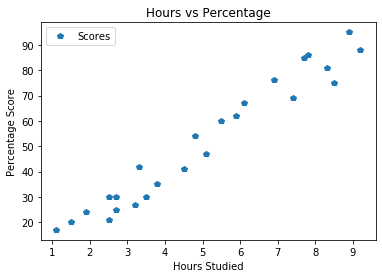

In [7]:
data.plot(x='Hours', y='Scores', style='p')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Step 3 - Data Preprocessing
This step involves division of data into "attributes" (inputs) and "labels" (outputs).Slicing to be done carefully.

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## Step 4 - Model Training
Splitting the data into training and testing sets,followed by training of data with suitable algorithm.

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Step 5 - Plotting the Line of regression 

Post training of the model, its time to visualize the best-fit line of regression.

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

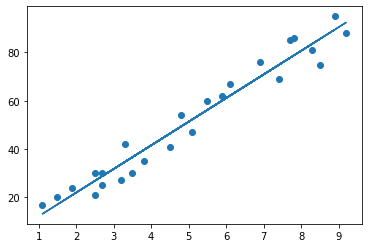

In [12]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Step 6 - Making Predictions
We have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


## Step 7 - Comparing Actual result to the Predicted Model result


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [15]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


## Step 8 - Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
R-2: 0.9568211104435257


In [17]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9484997422695115
Test Score: 0.9568211104435257


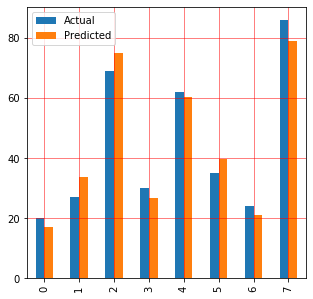

In [18]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()